## Hotel Review Text Analysis

In [1]:
# package imports

# basics
import pandas as pd
import numpy as np
import re
import string

# natural language processing
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.util import ngrams


#viz
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\50984\\Desktop\\DataScience\\JupyterNotebook'

In [3]:
df = pd.read_csv("C:\\Users\\50984\\Desktop\\DataScience\\Data\\hotel-reviews\\Datafiniti_Hotel_Reviews_Jun19.csv")

In [4]:
df.shape

(10000, 26)

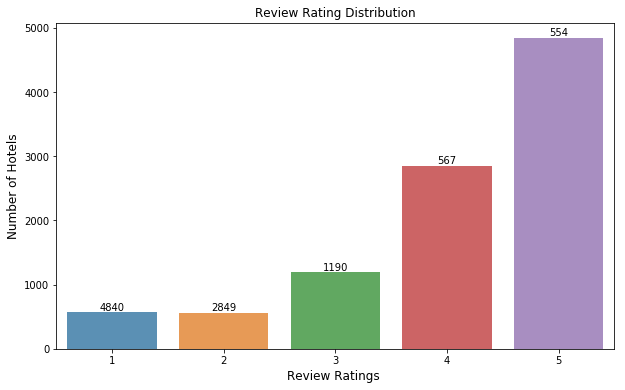

In [5]:
# visualizing the review ratings distribution 
ratings = df['reviews.rating'].value_counts()

#plot
plt.figure(figsize=(10,6))
ax = sns.barplot(ratings.index, ratings.values, alpha = 0.8)
plt.title("Review Rating Distribution")
plt.ylabel('Number of Hotels', fontsize=12)
plt.xlabel('Review Ratings ', fontsize=12)

# adding labels
rects = ax.patches
labels = ratings.values

for rect, label in zip (rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
plt.show()   

It seems like customers are more likely to leave low rating reviews than high rating reviews 

In [6]:
# select only the interested columns
df2 = df[['reviews.text','reviews.rating']]


In [7]:
# check for any missing valuesd
df2.isna().sum()

reviews.text      0
reviews.rating    0
dtype: int64

In [8]:
# text preprocessing

def preprocessing (document):
    
    '''Returns preprocessed documents'''
    
    document = str(document).lower() # convert to lower cases
    document = re.sub(r'\d+', '', document) # remove numbers
    document = document.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    document = document.strip() # remove white space
    
    tokenizer = RegexpTokenizer(r'\w+') # tokenize
    tokens = tokenizer.tokenize(document)
    
    # stop words
    stop_words = stopwords.words('english')  
    filtered_words = [w for w in tokens if not w in stop_words] # remove stop words
        
    # generate bigrams
    bigrams = ngrams(tokens, 2)
    # convert to list of bigram lists
    bigrams_clean = [list(generator) for generator in bigrams]
    # combine stopword list
    stop_words = stopwords.words('english')  
   
    # remove bigram if BOTH words are in stopword list
    bigrams_clean = [bigram for bigram in bigrams_clean if not all(word in stop_words for word in bigram)]
    # stem bigrams
    wordnet_lemmatizer = WordNetLemmatizer()
    bigrams_clean = [(wordnet_lemmatizer.lemmatize(bigram[0]),wordnet_lemmatizer.lemmatize(bigram[1])) for bigram in bigrams_clean]
        
        
        # stemmer
        #stemmer = EnglishStemmer()
        #filtered_words_stem = [stemmer.stem(w) for w in filtered_words]
        
    # Lemmatization 
    wordnet_lemmatizer = WordNetLemmatizer()
    filtered_words_lem = [wordnet_lemmatizer.lemmatize(w) for w in filtered_words]
                
    return (filtered_words_lem, bigrams_clean)

In [9]:
# run preprocessing

results = [preprocessing(reviews) for reviews in df2['reviews.text']]
cleaned_df = pd.DataFrame(results, columns=['unigram_clean', 'bigrams_clean'])

In [10]:
# reset index before concat
df2 = df2.reset_index(drop=True)
df3 = pd.concat([df2, cleaned_df], axis=1)

In [11]:
df3.head()

,reviews.text,reviews.rating,unigram_clean,bigrams_clean
0,"This hotel was nice and quiet. Did not know, t...",3,"[hotel, nice, quiet, know, train, track, near,...","[(this, hotel), (hotel, wa), (wa, nice), (nice..."
1,We stayed in the king suite with the separatio...,4,"[stayed, king, suite, separation, bedroom, liv...","[(we, stayed), (stayed, in), (the, king), (kin..."
2,"Parking was horrible, somebody ran into my ren...",3,"[parking, horrible, somebody, ran, rental, car...","[(parking, wa), (wa, horrible), (horrible, som..."
3,Not cheap but excellent location. Price is som...,5,"[cheap, excellent, location, price, somewhat, ...","[(not, cheap), (cheap, but), (but, excellent),..."
4,If you get the room that they advertised on th...,2,"[get, room, advertised, website, paid, may, lu...","[(you, get), (get, the), (the, room), (room, t..."
